<a href="https://colab.research.google.com/github/Clauciofds/Challenge-Data-Science2/blob/main/Challenge_Semana_I_v1_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Este é um projeto que tem como finalidade exercitar e desenvolver conhecimentos adiquiridos no curso que estou realizando pela Alura. Desta forma deve ser visto como um exercício e um projeto de desenvolvimento profissional.

A InsightPlaces disponibilizou os dados contidos no banco de dados quanto às informações de preços de imóveis da cidade do Rio de Janeiro. 

# Lendo os dados

Deve-se indicar o caminho onde o arquivo está armazenado e neste caso descompactar o banco de dados.
O método abaixo e uma forma mais rapida e prática para rodar este df neste projeto.

In [ ]:
!ls

sample_data


In [ ]:
!wget 'https://github.com/Clauciofds/Challenge-Data-Science2/raw/main/Dados/semana-1.zip' && unzip semana-1.zip -d dados/

--2022-12-01 15:10:26--  https://github.com/Clauciofds/Challenge-Data-Science2/raw/main/Dados/semana-1.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Clauciofds/Challenge-Data-Science2/main/Dados/semana-1.zip [following]
--2022-12-01 15:10:27--  https://raw.githubusercontent.com/Clauciofds/Challenge-Data-Science2/main/Dados/semana-1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18975214 (18M) [application/zip]
Saving to: ‘semana-1.zip’

semana-1.zip        100%[===================>]  18.10M  --.-KB/s    in 0.1s    

2022-12-01 15:10:28 (161 MB/s) - ‘semana-1.zip’ saved [18975214/1

Nesta célula instalei e inicilizei um sessão do pyspark v.3.3.1 (2022/11)

In [ ]:
!pip install pyspark==3.3.1
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('Transformando com Spark') \
    .getOrCreate()


spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Lendo os dados descompactados


In [ ]:
dados = spark.read.json('/content/dados/dataset_bruto.json')

Primeira varredura e verificação dos dados, sua informações, estrutura e volume.

*   Analise a quantidade de linhas e colunas;
*   Avalie a estrutura da base de dados;
*   Verifique se os tipos dos dados de cada coluna estão coerentes.

In [ ]:
dados.show(5)
dados.count(), len(dados.columns)

+--------------------+--------------------+--------------------+
|             anuncio|             imagens|             usuario|
+--------------------+--------------------+--------------------+
|{0, [], [16], [0]...|[{39d6282a-71f3-4...|{9d44563d-3405-4e...|
|{0, [], [14], [0]...|[{23d2b3ab-45b0-4...|{36245be7-70fe-40...|
|{0, [1026], [1026...|[{1da65baa-368b-4...|{9dc415d8-1397-4d...|
|{0, [120], [120],...|[{79b542c6-49b4-4...|{9911a2df-f299-4a...|
|{0, [3], [3], [0]...|[{e2bc497b-6510-4...|{240a7aab-12e5-40...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



(89083, 3)

In [ ]:
dados.printSchema()

root
 |-- anuncio: struct (nullable = true)
 |    |-- andar: long (nullable = true)
 |    |-- area_total: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- area_util: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- banheiros: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- caracteristicas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- endereco: struct (nullable = true)
 |    |    |-- bairro: string (nullable = true)
 |    |    |-- cep: string (nullable = true)
 |    |    |-- cidade: string (nullable = true)
 |    |    |-- estado: string (nullable = true)
 |    |    |-- latitude: double (nullable = true)
 |    |    |-- longitude: double (nullable = true)
 |    |    |-- pais: string (nullable = true)
 |    |    |-- rua: string (nullable = true)
 |    |    |-- zona: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-

Nossa base de dados possui 3 campos principais:

1.   anuncio
2.   imagens
2.   usuario

Para nossa análise, apenas as informações do campo "anuncio" serão relevantes. Por isso, vamos focar em analisar as colunas desse campo.

In [ ]:
anuncio = dados\
      .select(
          'anuncio.*'
      )

In [ ]:
anuncio.show(3)

+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+------------+------------+---------+----+--------------------+
|andar|area_total|area_util|banheiros|caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade| tipo_uso|vaga|             valores|
+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+------------+------------+---------+----+--------------------+
|    0|        []|     [16]|      [0]|             []|{Centro, 20061003...|47d553e0-79f2-4a4...|    [0]|   [0]|       Usado|      Outros|Comercial| [1]|[{260, 107, Venda...|
|    0|        []|     [14]|      [0]|             []|{Centro, 20051040...|b6ffbae1-17f6-487...|    [0]|    []|       Usado|      Outros|Comercial| [0]|[{260, 107, Venda...|
|    0|    [1026]|   [1026]|      [0]|             []|{Maria da Graça, ...|1fb030a5-9e3e-4a1...|    [0]|    []|       Usado|      

,tipo_uso,count
0,Comercial,4542
1,Residencial,84541


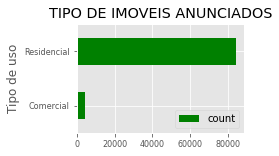

In [ ]:
#Usando o select para quantificar os tipo de anuncio no DF.

anuncio_graf01 = anuncio\
      .select('tipo_uso')\
      .orderBy('tipo_uso')\
      .groupBy('tipo_uso')\
      .count()

#para apresentação gráfica o DF foi convertido para Pandas

import matplotlib.pyplot as plt
import matplotlib

anuncio_graf01 = anuncio_graf01.toPandas()

plt.rcParams['figure.figsize'] = (3,2)
matplotlib.style.use('ggplot')

anuncio_graf01.plot.barh(
    x = 'tipo_uso',
    xlabel='Tipo de uso',
    color='green',
    fontsize=8,
    title='TIPO DE IMOVEIS ANUNCIADOS'
)


anuncio_graf01

O time de Data Science solicitou que fizéssemos alguns filtros nas colunas **#tipo_uso**, **#tipo_unidade** e #tipo_anuncio nossa base de dados:

* tipo_uso: Residencial;
* tipo_unidade: Apartamento;
* tipo_anuncio: Usado.



> Nota: Neste projeto em especifico eu atribui os filtros em diferente variáveis. Mas me indicaram avaliar essa necessidade, por que isso pode causar sobrecarga e aumentar o volume de dados processados na máquina local e/ou vitual causando lentidão no processo por uso desnecessário de recursos.



Filtrando por tipo residêncial

In [ ]:
anuncio_residencial = anuncio\
      .filter("tipo_uso == 'Residencial'")

In [ ]:
anuncio_residencial.show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    0|     [120]|    [120]|      [0]|[Portão eletrônic...|{Campo Grande, 23...|ac6cb348-69d6-45a...|    [0]|    []|       Usado|      Outros|Residencial|  []|[{80, null, Venda...|
|    0|       [3]|      [3]|      [0]|                  []|{São Cristóvão, 2...|e032b908-ef42-4d4...|    [0]|    []|       Usado|      Outros|Residencial|  []|[{0, 0, Venda, 50...|
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-4

+------------+-----+
|tipo_unidade|count|
+------------+-----+
|      Outros| 7517|
| Apartamento|66797|
|        Casa|10227|
+------------+-----+



,tipo_unidade,count
0,Outros,7517
1,Apartamento,66797
2,Casa,10227


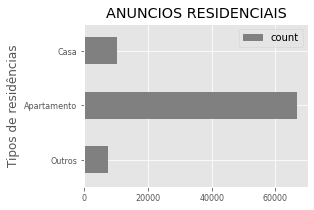

In [ ]:
import pyspark
from pyspark.sql.functions import col, asc, desc

anuncio_graf02 = anuncio_residencial\
      .orderBy(col('tipo_unidade').asc())\
      .groupBy('tipo_unidade')\
      .count()

anuncio_graf02.show()

anuncio_graf02 = anuncio_graf02.toPandas()

plt.rcParams['figure.figsize'] = (4,3)
matplotlib.style.use('ggplot')

anuncio_graf02.plot.barh(
    x='tipo_unidade',
    xlabel = 'Tipos de residências',
    color = 'gray',
    fontsize = 8,
    title = 'ANUNCIOS RESIDENCIAIS'
)

anuncio_graf02

In [ ]:
anuncio_apartamento = anuncio_residencial\
      .filter("tipo_unidade == 'Apartamento'")\
      .show(5)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [ ]:
anuncio_tipo\
      .groupBy('tipo_anuncio')\
      .count()\
      .show()

+------------+-----+
|tipo_anuncio|count|
+------------+-----+
|       Usado|88827|
+------------+-----+



In [ ]:
anuncio_tipo = anuncio_residencial\
      .filter("tipo_unidade == 'Apartamento'")\
      .filter("tipo_anuncio == 'Usado'")

In [ ]:
anuncio_tipo.show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

In [ ]:
from pyspark.sql import functions as f

In [ ]:
anuncio_tipo\
        .select(f.size(f.col('quartos')).alias('quartos'))\
        .groupBy('quartos')\
        .count()\
        .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+



In [ ]:
caracteristicas = ['area_total', 'area_util', 'banheiros', 'quartos', 'suites', 'vaga']

for col in caracteristicas:
    anuncio_tipo\
        .select(f.size(f.col(col)).alias(col))\
        .groupBy(col)\
        .count()\
        .show()

+----------+-----+
|area_total|count|
+----------+-----+
|         1|57368|
|         0| 9194|
+----------+-----+

+---------+-----+
|area_util|count|
+---------+-----+
|        1|66562|
+---------+-----+

+---------+-----+
|banheiros|count|
+---------+-----+
|        1|66562|
+---------+-----+

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+

+------+-----+
|suites|count|
+------+-----+
|     1|61008|
|     0| 5554|
+------+-----+

+----+-----+
|vaga|count|
+----+-----+
|   1|63545|
|   0| 3017|
+----+-----+



In [ ]:
anuncio_tipo\
      .select([f.col(c)[0].alias(c) if c in caracteristicas else c for c in anuncio_tipo.columns])\
      .show(5)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|[{245, null, Vend...|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|[{0, 0, Venda, 15...|
|    1|        41|       41|        1|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4